# Analyse de stats Youtube

Grace aux données de science étonnante : https://sciencetonnante.wordpress.com/2017/08/30/de-quoi-le-succes-dune-chaine-youtube-de-vulgarisation-depend-il/

In [2]:
# imports
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.tools.plotting import scatter_matrix

In [3]:
# chargement du csv
df = pd.read_csv('statsYT.csv',sep=';')

In [4]:
# on renomme la colonne non nommee
df['name'] = df['Unnamed: 0']
# affichage des premieres lignes
df.head()

,Unnamed: 0,Abos,Vues,AgeJ,Videos,IncF,FC,name
0,AK1,12288,2394779,893,140,0,1,AK1
1,Albert,90362,1580676,536,12,0,0,Albert
2,Alexis_Rastier,1245,29292,2007,23,0,0,Alexis_Rastier
3,AnthroStory,2912,144722,1137,89,0,0,AnthroStory
4,Ascl_pios,12892,245828,409,11,0,1,Ascl_pios


In [5]:
# Calcul des métriques qu'a calculé David qui ne sont pas dans le csv : 
# - log des abonnes
df['logabos'] = np.log(df['Abos'])
# - frequence de publication
df['freqPub'] = df['Videos']/df['AgeJ']

In [14]:
# colorisations pour H/F et FaceCam/PasFaceCam
df.loc[(df['IncF'] == 1) & (df['FC'] == 1),'colors'] = '#FF0000' # femme Facecam en rouge
df.loc[(df['IncF'] == 0) & (df['FC'] == 1),'colors'] = '#00FF00' # homme Facecam en vert
df.loc[(df['IncF'] == 1) & (df['FC'] == 0),'colors'] = '#000000' # femme pas facecam en noir (il n'y en a pas)
df.loc[(df['IncF'] == 0) & (df['FC'] == 0),'colors'] = '#0000FF' # homme pas facecam en bleu


print len(df[(df['IncF'] == 1) & (df['FC'] == 1)]), 'with incF,FC == 1,1'
print len(df[(df['IncF'] == 0) & (df['FC'] == 1)]), 'with incF,FC == 0,1'
print len(df[(df['IncF'] == 1) & (df['FC'] == 0)]), 'with incF,FC == 1,0' # 0 femmes non FaceCam dans les donnees
print len(df[(df['IncF'] == 0) & (df['FC'] == 0)]), 'with incF,FC == 0,0'



16 with incF,FC == 1,1
75 with incF,FC == 0,1
0 with incF,FC == 1,0
24 with incF,FC == 0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11767d890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118516850>]], dtype=object)

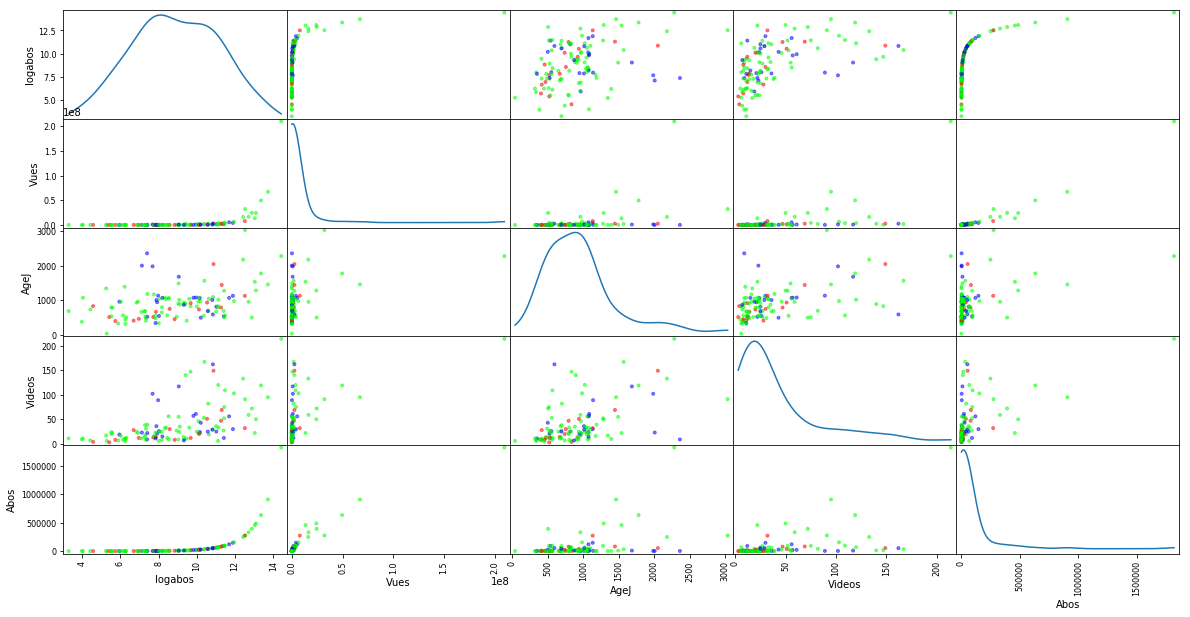

In [16]:
# relations entre les donnees
pd.scatter_matrix(df[['logabos','Vues','AgeJ','Videos','Abos']], alpha=0.5, figsize=(20, 10), c=df['colors'], diagonal='kde')

Cette matrice représente a chaque fois une variable par rapport à une autre, un point étant une chaine et la couleur indiquant si c'est des Hommes/Femmes, Facecam ou non.

En diagonale on a les densité de répartition de ces variables.

Comme le dit David dans son article, on retrouve qu'il n'y a pas une variable qui permet de prédire directement le nombre d'abonnés. 

Il y a quelques variables qui semblent quand même être en forte relation avec le nombre d'abonnés : vues et vidéos. 

On imagine qu'un youtuber avec plus d'abonnés aura plus de vues, mais vérifions : 


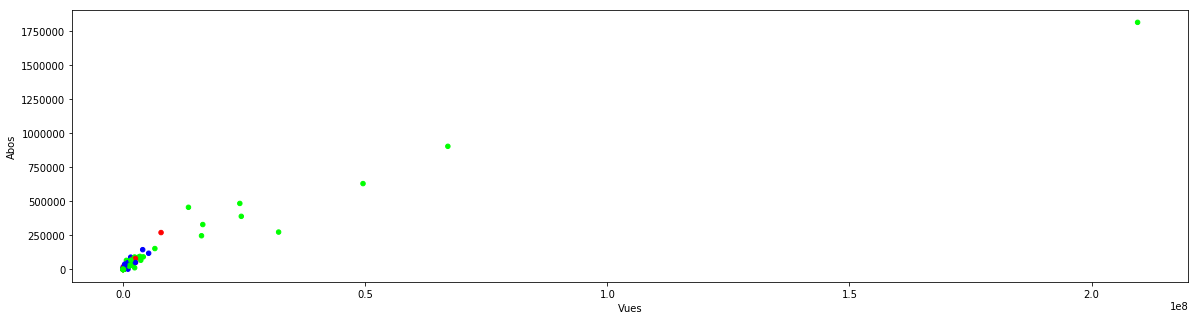

In [24]:
df.plot(kind='scatter',x='Vues',y='Abos',c=df['colors'],figsize=(20,5))

Ce qu'il apparait surtout, c'est que quelques outlayers nous empèchent d'y voir quoi que ce soit. Retirons donc les chaines avec plus de 10 millions de vues : 

In [30]:
outliers = df['Vues'] < 10000000 # chaines avec plus de 10M vues
df[~outliers][['name','IncF','FC']]

,name,IncF,FC
5,Axolot,0,1
20,Dans_ton_corps,0,1
24,Dirtybiology,0,1
25,DrNozman,0,1
27,E-penser,0,1
28,ExperimentBoy,0,1
36,Incroyables_expériences,0,1
63,Mic_Maths,0,1
79,Science_étonnante,0,1


On remarque (sans pouvoir vraiment en conclure quoi que ce soit) que ce sont toutes de schaines tenues par des hommes en facecam.

On peut alors réafficher le graphe précédent : 

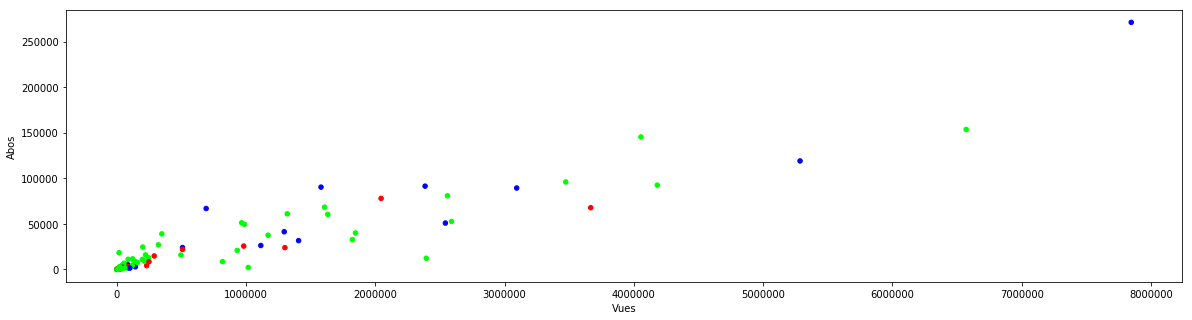

In [31]:
df[outliers].plot(kind='scatter',x='Vues',y='Abos',c=df['colors'],figsize=(20,5))

Ici on commence a voir des choses intéressantes. Mais malgré tout, le fait que le nombre de vues soit lié au nombre d'abonnés parrait pas très étonnant et surtout pas très utile pour faire de la prédiction. PAssons donc à l'autre variable : le nombre de vidéos.

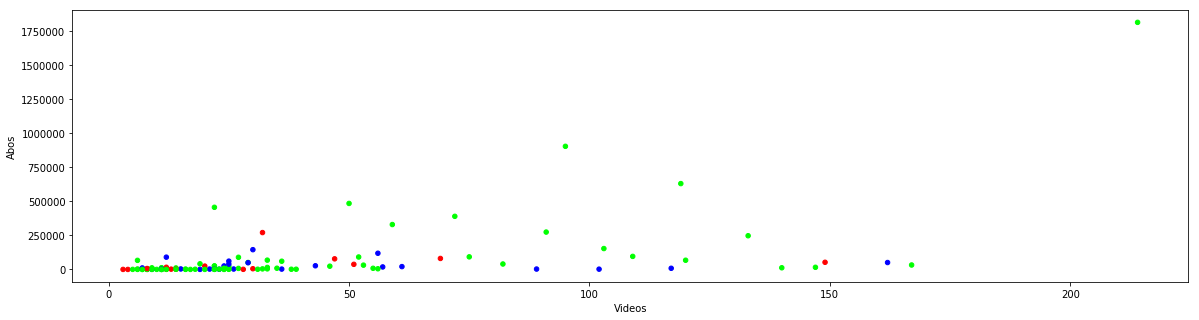

In [32]:
df.plot(kind='scatter',x='Videos',y='Abos',c=df['colors'],figsize=(20,5))

On retrouve nos outliers donc retirons les : 

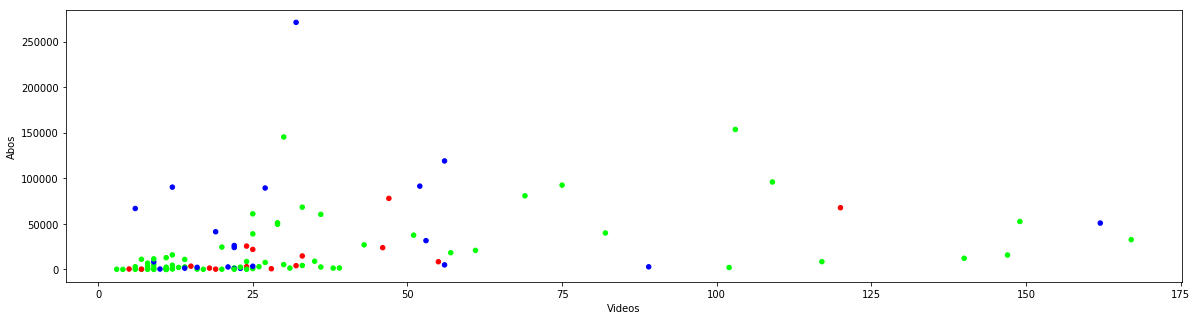

In [33]:
df[outliers].plot(kind='scatter',x='Videos',y='Abos',c=df['colors'],figsize=(20,5))

C'est déjà beaucoup moins clair mais la courbe est écraése par quelques courbes avec beaucoup d'aboonés. Retirons donc les chaines avec plus de 50000 abonnés

In [39]:
outliers2 = df['Abos'] < 50000
df[(~outliers2)&(outliers)][['name','IncF','FC']]

,name,IncF,FC
1,Albert,0,0
15,C_est_une_autre_histoire,1,1
22,Dimension,0,0
23,AstronoGeek,0,1
30,Florence_Porcel,1,1
33,Heu_Reka,0,1
34,Hygiène_mentale,0,0
41,La_minute_science,0,0
46,La_tronche_en_biais,0,1
51,Le_PsyLab,0,1


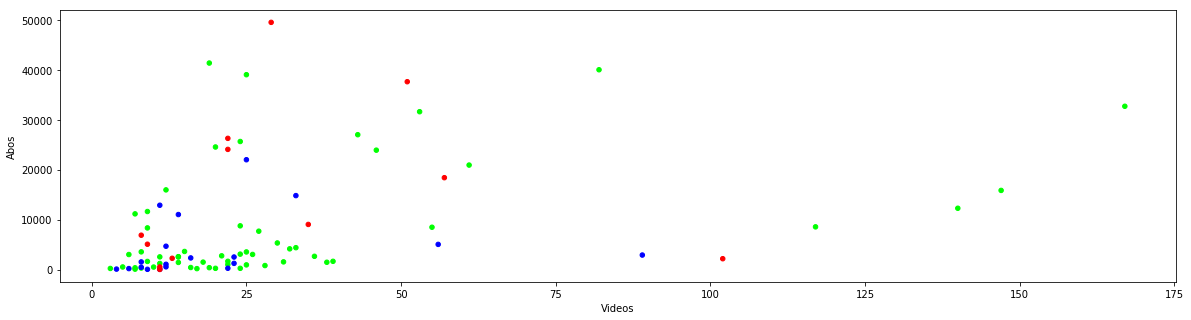

In [40]:
df[outliers&outliers2].plot(kind='scatter',x='Videos',y='Abos',c=df['colors'],figsize=(20,5))

Ce graphe et le précédent permet de voir que selon les chaines la relation entre nombre de vidéos et nombre d'abonnés, bien que linéaire n'est pas du tout la même. On observe (et j'ai pas ici fait les régression linéaires, il faudra le faire) qu'il y a pour les chaines de moins de 50k abonnés trois grand comportements : 

- autour de 1000 abonnés par vidéo
- autour de 400 abonnés par vidéo
- autour de 71 abonnés par vidéo

Tout ceci ne sont bien sur que des corrélations. Une interprétation que j'ai et qui serait à vérifier est qu'à un moment une chaine "décole" et son nombre d'abonnés par vidéo lui aussi décole d'un coup et ceci peut se faire a un peu n'importe quel moment de la vie de la chaine. 

Quant à l'influence H/F et Facecam ou pas, il est dur de conclure. Pour les chaines de moins de 50000 abonnés et moins de 10Millions de vues, ce dernier graphique laisse à penser, comme le